In [ ]:
API_KEY = "edf80af23f8f44c9ddaaf02d46c42e88"

In [ ]:
!pip install unidecode

**Usado para corrigir o arquivo VRA_2023_10 para o formato UTF-8**

In [ ]:
from google.colab import files

import pandas as pd
from unidecode import unidecode

VRA_2023_10 = '/content/VRA_2023_10.csv'

print("Carregando o arquivo...")
df = pd.read_csv(VRA_2023_10, sep=';', encoding='latin1')

df.columns = [unidecode(col) for col in df.columns]

print("Corrigindo caracteres...")
df = df.applymap(lambda x: unidecode(x) if isinstance(x, str) else x)

output_file = '/content/VRA_2023_10_corrigido.csv'
df.to_csv(output_file, index=False, encoding='utf-8')

print("Arquivo corrigido salvo como 'VRA_2023_10_corrigido.csv'")
files.download(output_file)

**Usado para corrigir o arquivo aerodromos para o formato UTF-8**

In [ ]:
from google.colab import files
import pandas as pd

file_aerodromos = "/content/aerodromos.csv"

print("Carregando o arquivo...")
df_aerodromos = pd.read_csv(file_aerodromos, sep=';', encoding='latin1')

df_aerodromos.columns = [
    col.encode('latin1').decode('utf-8') for col in df_aerodromos.columns
]

print("Corrigindo caracteres...")
df_aerodromos = df_aerodromos.applymap(
    lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x
)

output_file_aerodromos = '/content/aerodromos_corrigido.csv'
df_aerodromos.to_csv(output_file_aerodromos, index=False, encoding='utf-8')

print(f"Arquivo corrigido salvo como '{output_file_aerodromos}'")
files.download(output_file_aerodromos)

Carregando o arquivo...
Corrigindo caracteres...
Arquivo corrigido salvo como '/content/aerodromos_corrigido.csv'


<ipython-input-1-75cbdc913ebf>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_aerodromos = df_aerodromos.applymap(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import pandas as pd

file_aerodromos = "/content/aerodromos.csv"

print("Carregando o arquivo...")
df_aerodromos = pd.read_csv(file_aerodromos, sep=';', encoding='latin1')

df_aerodromos.columns = [
    col.encode('latin1').decode('utf-8') for col in df_aerodromos.columns
]

print("Corrigindo caracteres...")
df_aerodromos = df_aerodromos.applymap(
    lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x
)

df_aerodromos['LATITUDE'] = (
    df_aerodromos['LATITUDE'].str.replace(',', '.').astype(float)
)
df_aerodromos['LONGITUDE'] = (
    df_aerodromos['LONGITUDE'].str.replace(',', '.').astype(float)
)

output_file_aerodromos = '/content/aerodromos_corrigido.csv'
df_aerodromos.to_csv(output_file_aerodromos, index=False, encoding='utf-8')

print(f"Arquivo corrigido salvo como '{output_file_aerodromos}'")
files.download(output_file_aerodromos)

Carregando o arquivo...
Corrigindo caracteres...
Arquivo corrigido salvo como '/content/aerodromos_corrigido.csv'


<ipython-input-21-91a94d013f6d>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_aerodromos = df_aerodromos.applymap(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ETAPA 1 - Dias da semana, finais de semana e feriados**

In [ ]:
import pandas as pd
from datetime import datetime
import holidays

arquivo = '/content/VRA_2023_10_corrigido.csv'
df = pd.read_csv(arquivo, sep=';', encoding='utf-8')

df['Referência'] = pd.to_datetime(df['Referência'], errors='coerce')

df = df.dropna(subset=['Referência'])

df['Dia da Semana'] = df['Referência'].dt.day_name()

df['Final de Semana'] = df['Referência'].dt.weekday.isin([5, 6])

anos_validos = df['Referência'].dt.year.unique()
br_holidays = holidays.Brazil(years=anos_validos)
df['Feriado'] = df['Referência'].isin(br_holidays)

arquivo_saida = 'VRA_2023_10_corrigido_etapa_1.csv'
df.to_csv(arquivo_saida, index=False)

print(f"Arquivo processado e salvo como {arquivo_saida}")


<ipython-input-16-973770744ab2>:25: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['Feriado'] = df['Referência'].isin(br_holidays)


Arquivo processado e salvo como VRA_2023_10_corrigido_etapa_1.csv


**ETAPA 2 - Latitude / Longitude**

In [ ]:
import pandas as pd

VRA_2023_10_corrigido_etapa_1 = '/content/VRA_2023_10_corrigido_etapa_1.csv'  # Substitua pelo caminho correto do arquivo
file_aerodromos_corrigido = "/content/aerodromos.csv"  # Substitua pelo caminho correto do arquivo

VRA_2023_10_corrigido_etapa_1 = pd.read_csv(VRA_2023_10_corrigido_etapa_1)
df_aerodromos = pd.read_csv(file_aerodromos_corrigido, sep=";")

df_aerodromos.rename(columns={
    'SIGLA ICAO AERÓDROMO': 'SIGLA ICAO',
    'LATITUDE': 'LATITUDE_ORIGEM',
    'LONGITUDE': 'LONGITUDE_ORIGEM'
}, inplace=True)

df_merged = VRA_2023_10_corrigido_etapa_1.merge(df_aerodromos[['SIGLA ICAO', 'LATITUDE_ORIGEM', 'LONGITUDE_ORIGEM']],
                                   left_on='Sigla ICAO Aeroporto Origem',
                                   right_on='SIGLA ICAO',
                                   how='left')

df_aerodromos.rename(columns={
    'LATITUDE_ORIGEM': 'LATITUDE_DESTINO',
    'LONGITUDE_ORIGEM': 'LONGITUDE_DESTINO'
}, inplace=True)

df_merged = df_merged.merge(df_aerodromos[['SIGLA ICAO', 'LATITUDE_DESTINO', 'LONGITUDE_DESTINO']],
                            left_on='Sigla ICAO Aeroporto Destino',
                            right_on='SIGLA ICAO',
                            how='left')

df_merged.drop(columns=['SIGLA ICAO_x', 'SIGLA ICAO_y'], inplace=True)

df_merged.to_csv('VRA_2023_10_corrigido_etapa_2.csv', index=False)


files.download('VRA_2023_10_corrigido_etapa_2.csv')

print("Colunas de latitude e longitude adicionadas com sucesso!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Colunas de latitude e longitude adicionadas com sucesso!


**Capturar tempo médio de voo**

In [ ]:
import pandas as pd

registros = '/content/registros.csv'

dataset = pd.read_csv(registros, delimiter=";")

dataset["Horário Partida"] = pd.to_datetime(dataset["Horário Partida"], format="%H:%M")
dataset["Horário Chegada"] = pd.to_datetime(dataset["Horário Chegada"], format="%H:%M")

dataset["Tempo esperado de voo"] = (dataset["Horário Chegada"] - dataset["Horário Partida"]).dt.seconds // 60

new_dataset = dataset[["Cód. Empresa", "Empresa", "Nº Voo", "Equip.", "Cód. Origem", "Cód Destino", "Tempo esperado de voo"]]

output_path = "registros_temp_voos.csv"
new_dataset.to_csv(output_path, index=False)

print(f"CSV gerado e salvo como {output_path}")

CSV gerado e salvo como registros_temp_voos.csv


**ETAPA 3 - Alocar tempo esperado de voo em cada um dos voos**

In [ ]:
from google.colab import files
import pandas as pd

file1 = "/content/VRA_2023_10_corrigido_etapa_2.csv"
file2 = "/content/registros_temp_voos.csv"

df1 = pd.read_csv(file1, sep=',', encoding='utf-8')
df2 = pd.read_csv(file2, sep=',', encoding='utf-8')

df2 = df2[["Cód. Origem", "Cód Destino", "Tempo esperado de voo"]].drop_duplicates()

df2 = df2.rename(columns={"Cód. Origem": "Sigla ICAO Aeroporto Origem", "Cód Destino": "Sigla ICAO Aeroporto Destino"})

df_combined = pd.merge(df1, df2,
                       on=["Sigla ICAO Aeroporto Origem", "Sigla ICAO Aeroporto Destino"],
                       how="left")


output_file = 'VRA_com_tempo_esperado_final.csv'
df_combined.to_csv(output_file, index=False, encoding='utf-8')


print(f"Arquivo salvo como '{output_file}'. Faça o download abaixo:")
files.download(output_file)

**Excluir colunas que não vão ser utilizadas**

In [ ]:
from google.colab import files
import pandas as pd

file = "/content/VRA_2023_10_corrigido_etapa_3.csv"

df = pd.read_csv(file, sep=',', encoding='utf-8')

df = df.drop(columns=['Código DI','Código Tipo Linha','Modelo Equipamento','Número de Assentos','Partida Real','Chegada Real','Situação Voo','Justificativa','Referência','Situação Partida'])

output_file = 'VRA_2023_10_corrigido_etapa_4.csv'
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"Arquivo salvo como '{output_file}'. Faça o download abaixo:")
files.download(output_file)

Arquivo salvo como 'VRA_2023_10_corrigido_etapa_4.csv'. Faça o download abaixo:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import pandas as pd

file = "/content/VRA_2023_10_corrigido_etapa_4.csv"

df = pd.read_csv(file, sep=',', encoding='utf-8')

df_sampled = df.sample(n=300, random_state=42)  # random_state para resultados reprodutíveis

output_file = 'arquivo_amostra_300_linhas.csv'
df_sampled.to_csv(output_file, index=False)

print(f"Arquivo salvo como '{output_file}'. Faça o download abaixo:")
files.download(output_file)

Arquivo salvo como 'arquivo_amostra_300_linhas.csv'. Faça o download abaixo:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import requests
from datetime import datetime
import time
from google.colab import files

file = "/content/arquivo_amostra_300_linhas.csv"
df = pd.read_csv(file)

def to_unix_time(date_str):
    if isinstance(date_str, str):
        try:
            return int(time.mktime(datetime.strptime(date_str, "%d/%m/%Y %H:%M").timetuple()))
        except ValueError:
            return None
    return None

df["Partida Prevista"] = df["Partida Prevista"].astype(str)

df["dt_origem"] = df["Partida Prevista"].apply(to_unix_time)
df["dt_destino"] = df["dt_origem"] + (df["Tempo esperado de voo"] * 60)

def get_weather(lat, lon, dt):
    if pd.isna(dt):
        print("Valor de 'dt' inválido, pulando...")
        return None
    dt = int(dt)
    url = f"https://api.openweathermap.org/data/3.0/onecall/timemachine?lat={lat}&lon={lon}&dt={dt}&appid={API_KEY}&units=metric"
    print(url)
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        weather_data = data["data"][0]
        return {
            "temp": weather_data.get("temp"),
            "feels_like": weather_data.get("feels_like"),
            "pressure": weather_data.get("pressure"),
            "humidity": weather_data.get("humidity"),
            "dew_point": weather_data.get("dew_point"),
            "uvi": weather_data.get("uvi"),  # Retorna None se a chave não existir
            "clouds": weather_data.get("clouds"),
            "visibility": weather_data.get("visibility"),
            "wind_speed": weather_data.get("wind_speed"),
            "wind_deg": weather_data.get("wind_deg"),
            "weather_main": weather_data["weather"][0]["main"] if "weather" in weather_data else None,
            "weather_description": weather_data["weather"][0]["description"] if "weather" in weather_data else None,
        }
    else:
        print(f"Erro na chamada à API: {response.status_code}")
        return None

cols_origem = ["temp_origem", "feels_like_origem", "pressure_origem", "humidity_origem", "dew_point_origem",
               "uvi_origem", "clouds_origem", "visibility_origem", "wind_speed_origem", "wind_deg_origem",
               "weather_main_origem", "weather_description_origem"]
cols_destino = ["temp_destino", "feels_like_destino", "pressure_destino", "humidity_destino", "dew_point_destino",
                "uvi_destino", "clouds_destino", "visibility_destino", "wind_speed_destino", "wind_deg_destino",
                "weather_main_destino", "weather_description_destino"]

for col in cols_origem + cols_destino:
    df[col] = None

for index, row in df.iterrows():
    print(f"Processando linha {index + 1}/{len(df)}...")

    origem = get_weather(row["LATITUDE_ORIGEM"], row["LONGITUDE_ORIGEM"], row["dt_origem"])
    if origem:
        for key, value in origem.items():
            df.at[index, f"{key}_origem"] = value

    destino = get_weather(row["LATITUDE_DESTINO"], row["LONGITUDE_DESTINO"], row["dt_destino"])
    if destino:
        for key, value in destino.items():
            df.at[index, f"{key}_destino"] = value

output_file = "dataset_com_clima_completo.csv"
df.to_csv(output_file, index=False)

print(f"Arquivo salvo como '{output_file}'. Faça o download abaixo:")
files.download(output_file)

Processando linha 1/300...
https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=-15,87111111&lon=-47,91861111&dt=1696420800&appid=edf80af23f8f44c9ddaaf02d46c42e88&units=metric
https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=-23,62611111&lon=-46,65638888&dt=1696426800&appid=edf80af23f8f44c9ddaaf02d46c42e88&units=metric
Processando linha 2/300...
https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=-34,558889&lon=-58,416389&dt=1696340100&appid=edf80af23f8f44c9ddaaf02d46c42e88&units=metric
https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=-23,43555555&lon=-46,47305555&dt=1696350900&appid=edf80af23f8f44c9ddaaf02d46c42e88&units=metric
Processando linha 3/300...
https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=-23,43555555&lon=-46,47305555&dt=1697034300&appid=edf80af23f8f44c9ddaaf02d46c42e88&units=metric
https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=41,800278&lon=12,238889&dt=1697074500&appid=edf80af23f8f44c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, mean_absolute_error

file_path = '/content/dataset_com_clima_completo.csv'
df = pd.read_csv(file_path)

num_columns = [
    'LATITUDE_ORIGEM', 'LONGITUDE_ORIGEM',
    'LATITUDE_DESTINO', 'LONGITUDE_DESTINO',
    'temp_origem', 'temp_destino',
    'pressure_origem', 'pressure_destino',
    'humidity_origem', 'humidity_destino',
    'clouds_origem', 'clouds_destino',
    'Tempo esperado de voo'
]

for col in num_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

df = df.drop(columns=['uvi_origem','uvi_destino'])
df = df.dropna()

df['Situação Chegada'] = df['Situação Chegada'].apply(lambda x: 1 if x != 'Pontual' else 0)

features_categoricas = ['Empresa Aérea', 'Sigla ICAO Aeroporto Origem', 'Sigla ICAO Aeroporto Destino', 'Dia da Semana']
features_numericas = [
    'LATITUDE_ORIGEM', 'LONGITUDE_ORIGEM',
    'LATITUDE_DESTINO', 'LONGITUDE_DESTINO',
    'temp_origem', 'temp_destino',
    'pressure_origem', 'pressure_destino',
    'humidity_origem', 'humidity_destino',
    'clouds_origem', 'clouds_destino',
    'Tempo esperado de voo', 'Final de Semana', 'Feriado'
]

X = df[features_categoricas + features_numericas]
y_class = df['Situação Chegada']
y_reg = df['Tempo esperado de voo']

X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42)

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas),
        ('num', 'passthrough', features_numericas)
    ]
)

clf_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(random_state=42))
])

clf_pipeline.fit(X_train, y_train_class)
y_pred_class = clf_pipeline.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test_class, y_pred_class))

reg_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', RandomForestRegressor(random_state=42))
])

reg_pipeline.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_pipeline.predict(X_test_reg)

print("Erro Absoluto Médio (MAE) - Regressão:")
print(mean_absolute_error(y_test_reg, y_pred_reg))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.62      0.29      0.39        28
           1       0.62      0.87      0.73        38

    accuracy                           0.62        66
   macro avg       0.62      0.58      0.56        66
weighted avg       0.62      0.62      0.58        66

Erro Absoluto Médio (MAE) - Regressão:
2.0836363636363635


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:51:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.53      0.32      0.40        28
           1       0.61      0.79      0.69        38

    accuracy                           0.59        66
   macro avg       0.57      0.56      0.54        66
weighted avg       0.58      0.59      0.57        66



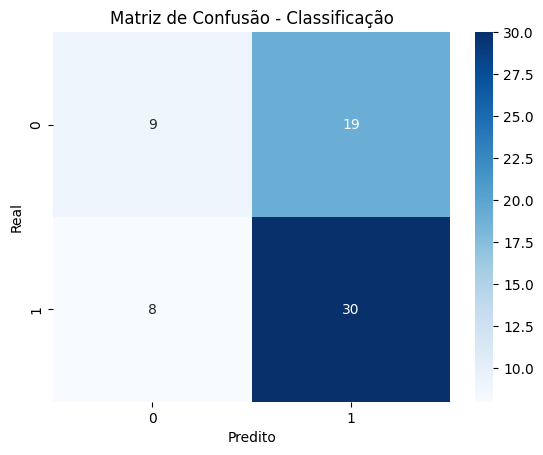

Erro Absoluto Médio (MAE) - Regressão:
1.7690747000954368


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:51:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['model_regression.pkl']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, mean_absolute_error, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

file_path = '/content/dataset_com_clima_completo.csv'
df = pd.read_csv(file_path)

num_columns = [
    'LATITUDE_ORIGEM', 'LONGITUDE_ORIGEM',
    'LATITUDE_DESTINO', 'LONGITUDE_DESTINO',
    'temp_origem', 'temp_destino',
    'pressure_origem', 'pressure_destino',
    'humidity_origem', 'humidity_destino',
    'clouds_origem', 'clouds_destino',
    'Tempo esperado de voo'
]

for col in num_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

df = df.drop(columns=['uvi_origem','uvi_destino'])
df = df.dropna()

df['Situação Chegada'] = df['Situação Chegada'].apply(lambda x: 1 if x != 'Pontual' else 0)

features_categoricas = ['Empresa Aérea', 'Sigla ICAO Aeroporto Origem', 'Sigla ICAO Aeroporto Destino', 'Dia da Semana']
features_numericas = [
    'LATITUDE_ORIGEM', 'LONGITUDE_ORIGEM',
    'LATITUDE_DESTINO', 'LONGITUDE_DESTINO',
    'temp_origem', 'temp_destino',
    'pressure_origem', 'pressure_destino',
    'humidity_origem', 'humidity_destino',
    'clouds_origem', 'clouds_destino',

    'Tempo esperado de voo', 'Final de Semana', 'Feriado'
]

X = df[features_categoricas + features_numericas]
y_class = df['Situação Chegada']
y_reg = df['Tempo esperado de voo']

X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42)

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas),
        ('num', 'passthrough', features_numericas)
    ]
)

clf_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('classifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

clf_pipeline.fit(X_train, y_train_class)
y_pred_class = clf_pipeline.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test_class, y_pred_class))

cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Classificação')
plt.show()

reg_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', xgb.XGBRegressor(random_state=42))
])

reg_pipeline.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_pipeline.predict(X_test_reg)

print("Erro Absoluto Médio (MAE) - Regressão:")
print(mean_absolute_error(y_test_reg, y_pred_reg))

clf_pipeline.fit(X_train, y_train_class)
joblib.dump(clf_pipeline, 'model_classification.pkl')  # Salvar modelo de classificação

reg_pipeline.fit(X_train_reg, y_train_reg)
joblib.dump(reg_pipeline, 'model_regression.pkl')  # Salvar modelo de regressão

In [ ]:
def testar_modelo(clf_pipeline, reg_pipeline, entrada_usuario):
    """
    Função para testar o modelo com dados simulados de um usuário.

    Args:
        clf_pipeline: Pipeline de classificação treinado.
        reg_pipeline: Pipeline de regressão treinado.
        entrada_usuario: Dicionário com os dados do usuário.

    Returns:
        Predições de atraso (classe) e tempo de atraso (regressão).
    """
    entrada_df = pd.DataFrame([entrada_usuario])

    entrada_df = entrada_df[features_categoricas + features_numericas]

    pred_class = clf_pipeline.predict(entrada_df)
    prob_class = clf_pipeline.predict_proba(entrada_df)

    pred_reg = reg_pipeline.predict(entrada_df)

    classe = "Atrasado" if pred_class[0] == 1 else "Pontual"
    prob_atrasado = prob_class[0][1] * 100

    print(f"Predição da Situação: {classe}")
    print(f"Probabilidade de Atraso: {prob_atrasado:.2f}%")
    print(f"Tempo Previsto de Atraso: {pred_reg[0]:.2f} minutos")

entrada_usuario = {
    'Empresa Aérea': 'GOL',
    'Sigla ICAO Aeroporto Origem': 'SBBR',
    'Sigla ICAO Aeroporto Destino': 'SBSP',
    'Dia da Semana': 'Monday',
    'LATITUDE_ORIGEM': -15.87111111,
    'LONGITUDE_ORIGEM': -47.91861111,
    'LATITUDE_DESTINO': -23.62611111,
    'LONGITUDE_DESTINO': -46.65638888,
    'temp_origem': 25.5,
    'temp_destino': 22.1,
    'pressure_origem': 1013,
    'pressure_destino': 1015,
    'humidity_origem': 80,
    'humidity_destino': 75,
    'clouds_origem': 20,
    'clouds_destino': 30,
    'Tempo esperado de voo': 95,
    'Final de Semana': 0,
    'Feriado': 0
}

testar_modelo(clf_pipeline, reg_pipeline, entrada_usuario)

Predição da Situação: Atrasado
Probabilidade de Atraso: 97.32%
Tempo Previsto de Atraso: 99.18 minutos


Relatório de Classificação:
                                                     precision    recall  f1-score   support

                          AEROLINEAS ARGENTINAS S/A       0.00      0.00      0.00         1
                                         AIR CANADA       0.50      1.00      0.67         1
                            AMERICAN AIRLINES, INC.       0.00      0.00      0.00         2
                 AZUL LINHAS AÉREAS BRASILEIRAS S/A       0.53      0.53      0.53        15
                               DELTA AIR LINES INC.       0.00      0.00      0.00         0
GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS S.A.)       0.39      0.33      0.36        21
                      JETSMART AIRLINES SPA - CHILE       0.00      0.00      0.00         1
                  PASSAREDO TRANSPORTES AÉREOS S.A.       0.00      0.00      0.00         1
                                   SKY AIRLINE S.A.       0.00      0.00      0.00         1
                             TAM LINHAS A

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

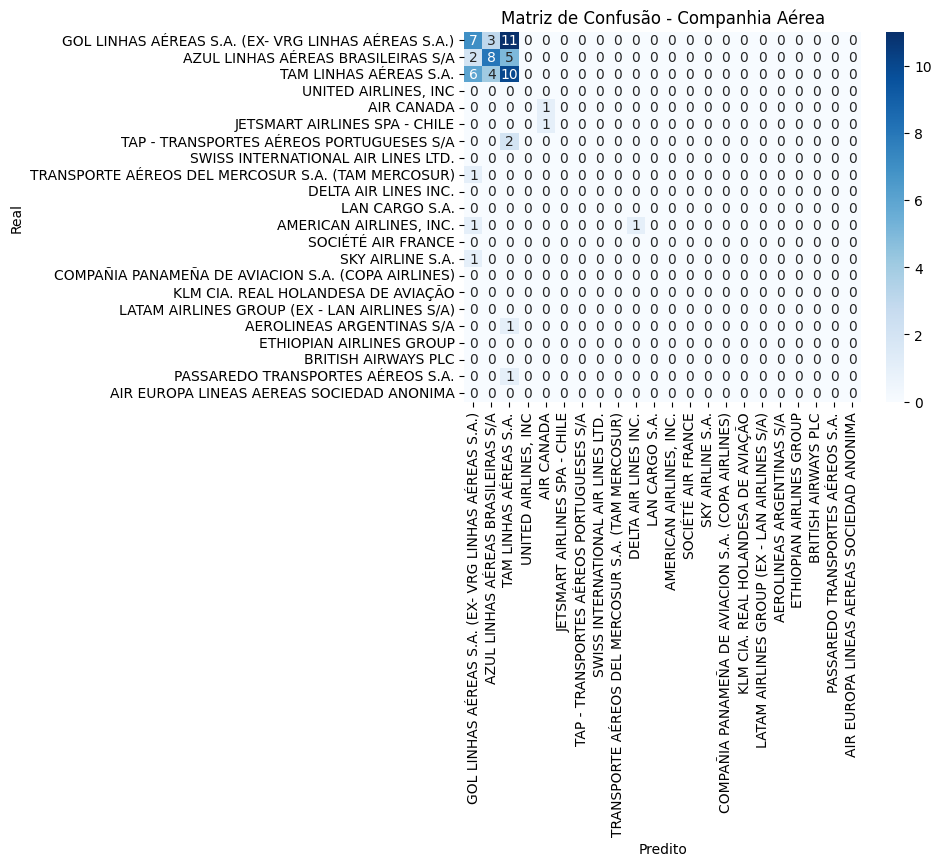

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

features_categoricas = ['Sigla ICAO Aeroporto Origem', 'Sigla ICAO Aeroporto Destino', 'Dia da Semana']
features_numericas = [
    'LATITUDE_ORIGEM', 'LONGITUDE_ORIGEM',
    'LATITUDE_DESTINO', 'LONGITUDE_DESTINO',
    'temp_origem', 'temp_destino',
    'pressure_origem', 'pressure_destino',
    'humidity_origem', 'humidity_destino',
    'clouds_origem', 'clouds_destino',
    'Tempo esperado de voo', 'Final de Semana', 'Feriado'
]

X = df[features_categoricas + features_numericas]
y = df['Empresa Aérea']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas),
        ('num', 'passthrough', features_numericas)
    ]
)

model_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(random_state=42))
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=y.unique())
sns.heatmap(cm, annot=True, fmt='d', xticklabels=y.unique(), yticklabels=y.unique(), cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Companhia Aérea')
plt.show()

Modelo salvo como 'modelo_companhia_aerea.pkl'
Relatório de Classificação:
                                                     precision    recall  f1-score   support

                          AEROLINEAS ARGENTINAS S/A       0.00      0.00      0.00         1
                                         AIR CANADA       0.50      1.00      0.67         1
                            AMERICAN AIRLINES, INC.       0.00      0.00      0.00         2
                 AZUL LINHAS AÉREAS BRASILEIRAS S/A       0.53      0.53      0.53        15
                               DELTA AIR LINES INC.       0.00      0.00      0.00         0
GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS S.A.)       0.39      0.33      0.36        21
                      JETSMART AIRLINES SPA - CHILE       0.00      0.00      0.00         1
                  PASSAREDO TRANSPORTES AÉREOS S.A.       0.00      0.00      0.00         1
                                   SKY AIRLINE S.A.       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

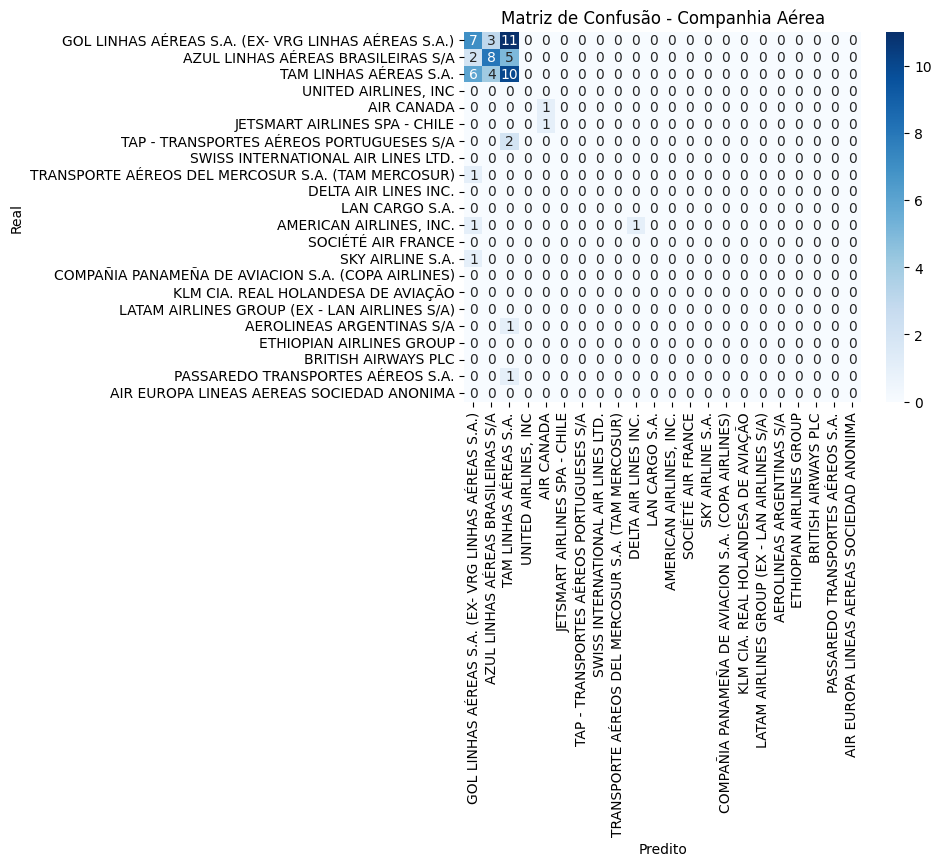

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

features_categoricas = ['Sigla ICAO Aeroporto Origem', 'Sigla ICAO Aeroporto Destino', 'Dia da Semana']
features_numericas = [
    'LATITUDE_ORIGEM', 'LONGITUDE_ORIGEM',
    'LATITUDE_DESTINO', 'LONGITUDE_DESTINO',
    'temp_origem', 'temp_destino',
    'pressure_origem', 'pressure_destino',
    'humidity_origem', 'humidity_destino',
    'clouds_origem', 'clouds_destino',
    'Tempo esperado de voo', 'Final de Semana', 'Feriado'
]

X = df[features_categoricas + features_numericas]
y = df['Empresa Aérea']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas),
        ('num', 'passthrough', features_numericas)
    ]
)

model_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(random_state=42))
])

model_pipeline.fit(X_train, y_train)

joblib.dump(model_pipeline, 'model_air_company.pkl')
print("Modelo salvo como 'modelo_companhia_aerea.pkl'")

y_pred = model_pipeline.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=y.unique())
sns.heatmap(cm, annot=True, fmt='d', xticklabels=y.unique(), yticklabels=y.unique(), cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Companhia Aérea')
plt.show()

In [ ]:
import pandas as pd
from joblib import load

model_pipeline = load('/content/model_air_company.pkl')  # Substitua pelo caminho correto do seu modelo salvo

input_dados = {
    'Sigla ICAO Aeroporto Origem': 'SBGR',
    'Sigla ICAO Aeroporto Destino': 'SBGL',
    'Dia da Semana': 'Monday',
    'LATITUDE_ORIGEM': -23.435556,
    'LONGITUDE_ORIGEM': -46.473056,
    'LATITUDE_DESTINO': -22.81,
    'LONGITUDE_DESTINO': -43.250556,
    'temp_origem': 28.5,
    'temp_destino': 26.3,
    'pressure_origem': 1013,
    'pressure_destino': 1012,
    'humidity_origem': 70,
    'humidity_destino': 65,
    'clouds_origem': 30,
    'clouds_destino': 20,
    'Tempo esperado de voo': 60,
    'Final de Semana': 0,
    'Feriado': 0
}

input_df = pd.DataFrame([input_dados])

resultado = model_pipeline.predict(input_df)

print("Companhia Aérea Sugerida:", resultado[0])

Companhia Aérea Sugerida: TAM LINHAS AÉREAS S.A.
